# Analysis of the score Variables
Goal of this section is to analyse the properties of the score variable. For hypothesis testing we need to check common assumptions such as size of sample, approximatly normal distribution, homogenity of variance (approximatly equal standard deviations).

Furthermore we need to choose between scores, because the SCHUFA has over about 10 different branch-scores, each 3 different versions, as well as a basisscore.

## Specify paths and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "/media/veracrypt1/SPON_dataset_tables/"
plot_path = "plots/"

In [3]:
#df_ds = pd.read_csv(data_path + "SPON_dataset_tables/timedependent_dataset_final_only_valid_level.csv", sep=";")

df_ds = pd.read_csv(data_path + "datasets_v2/20190703_dataset.csv", sep=";", low_memory=False)

In [4]:
table2 = df_ds[df_ds["table"]=="table2"]

In [5]:
# Color function for tables
def _color_map(c):
    c = abs(c)
    if c >= 0.1 and c < 0.3:
        color = "background-color: yellow"
    elif c >= 0.3 and c < 0.5:
        color = "background-color: orange"
    elif c >= 0.5:
        color = "background-color: red"
    else:
        color = ""
    return color

In [19]:
table2.domain.unique()

array(['Banken', 'Freiberufler', 'Genossenschaftsbanken', 'Handel',
       'Hypothekengeschäft', 'Kleingewerbetreibende', 'Sparkassen',
       'Sparkassen/Genossenschaftsbanken',
       'Telekommunikationsunternehmen', 'Versandhandel'], dtype=object)

## Analyse the different scores generally

### Branches

In [6]:
print("Different branches:", table2["domain"].unique())
print("Amount of branches:", len(table2["domain"].unique()))

Different branches: ['Banken' 'Freiberufler' 'Genossenschaftsbanken' 'Handel'
 'Hypothekengeschäft' 'Kleingewerbetreibende' 'Sparkassen'
 'Sparkassen/Genossenschaftsbanken' 'Telekommunikationsunternehmen'
 'Versandhandel']
Amount of branches: 10


Text(0.5, 1.0, 'Häufigkeiten der Score-Branche')

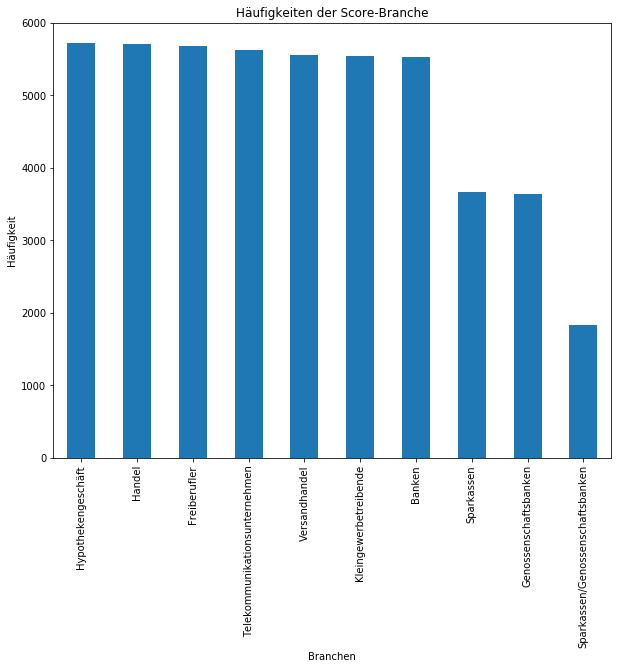

In [7]:
ax = table2["domain"].value_counts().plot(kind="bar", figsize=(10, 8))
ax.set_xlabel("Branchen")
ax.set_ylabel("Häufigkeit")
ax.set_title("Häufigkeiten der Score-Branche")

The branche-score are equaly distributed. Sparkassen and Genossenschaftbanken share the first version of the score "Sparkassen/Genossenschaftbanken"

### Versions

2.0    16896
3.0    16465
1.0    15125
0.0        5
Name: version, dtype: int64


Text(0.5, 1.0, 'Häufigkeiten der Score-Version')

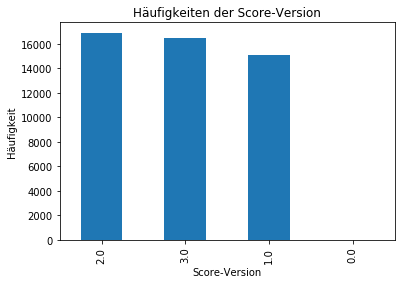

In [8]:
print(table2["version"].value_counts())
ax = table2["version"].value_counts().plot(kind="bar")
ax.set_xlabel("Score-Version")
ax.set_ylabel("Häufigkeit")
ax.set_title("Häufigkeiten der Score-Version")

The versions are also similarly distributed. Version 0 is only for Banken available and is an exception for one person in the dataset. It will be ignored.

Text(0.5, 1.0, 'frequency of sector score per Version')

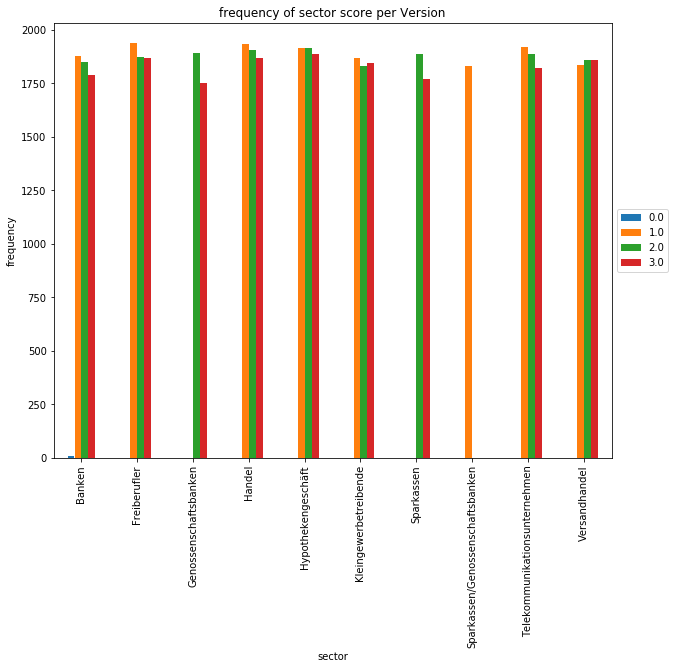

In [20]:
ax = table2.groupby("domain")["version"].value_counts().unstack().fillna(0).plot(kind="bar", figsize=(10,8))
ax.set_xlabel("sector")
ax.set_ylabel("frequency")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title("frequency of sector score per Version")

### Levels

Text(0.5, 1.0, 'frequency of score-ratings')

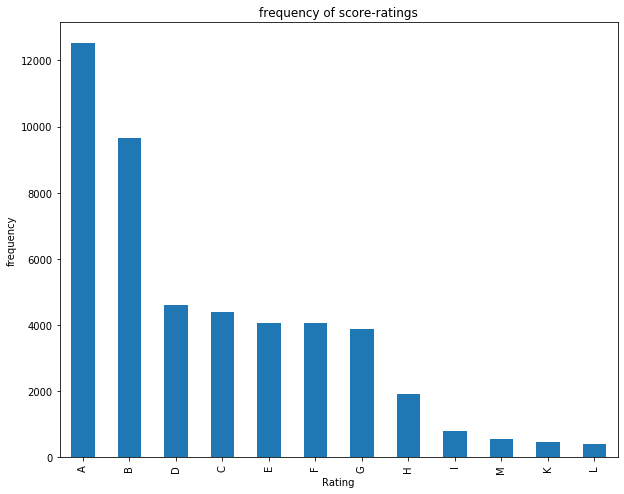

In [21]:
ax = table2["level"].value_counts().plot(kind="bar", figsize=(10, 8))
ax.set_xlabel("Rating")
ax.set_ylabel("frequency")
ax.set_title("frequency of score-ratings")

Most persons have the "best" rating, available in the dataset. There are also many persons with B, C, D, E, F, G. Only few have a poorer rating. The ratings N, O, P are for persons with negative features.

### Datenarten
Those dimensions are displayed in the schufa-auskunft to give a hint about the dimensions that are influencing the score in a positive or negative way (ranges: --, -, o, +, ++). The Datenart "anschrift" uses location of a person, where she is situated. The Datenart "allgemein" uses also social dimensions.

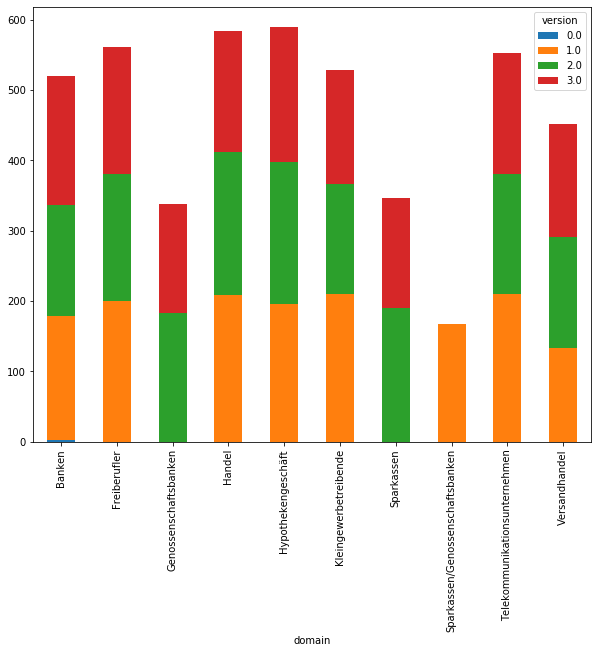

In [11]:
table2[table2["anschrift"]!="n/v"].groupby(["domain", "version"])["version"].count().unstack("version").fillna(0).plot(kind="bar", stacked=True, figsize=(10,8))

The Datenat "anschrift" is used in all versions.

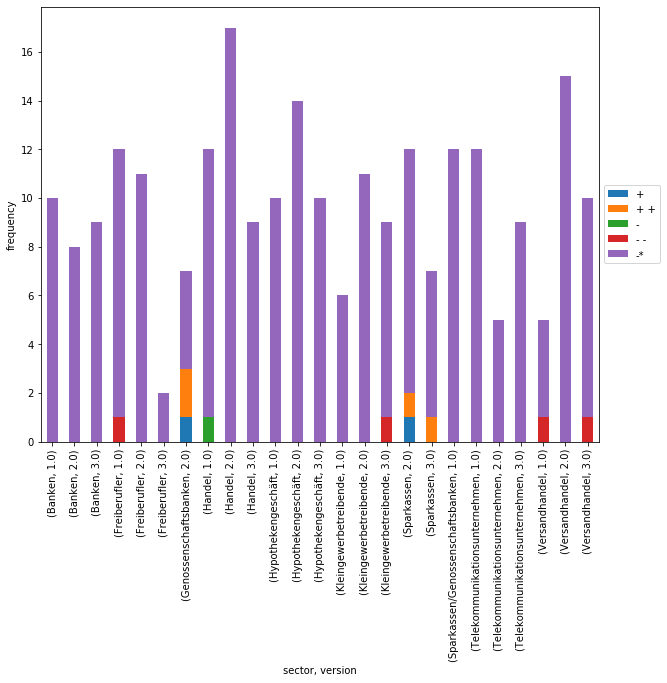

In [22]:
# Anschrift
ax = table2[table2["anschrift"]!="n/v"].groupby(["domain", "version", "anschrift"])["anschrift"].count().unstack("anschrift").fillna(0).plot(kind="bar", stacked=True, figsize=(10,8))
ax.set_xlabel("sector, version")
ax.set_ylabel("frequency")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_title("Häufigkeiten der Datenart 'anschrift' pro Score-Branche und Version (n/a Kategorie ignoriert)")

Text(0.5, 1.0, "frequency of data type 'general' per sector score and version")

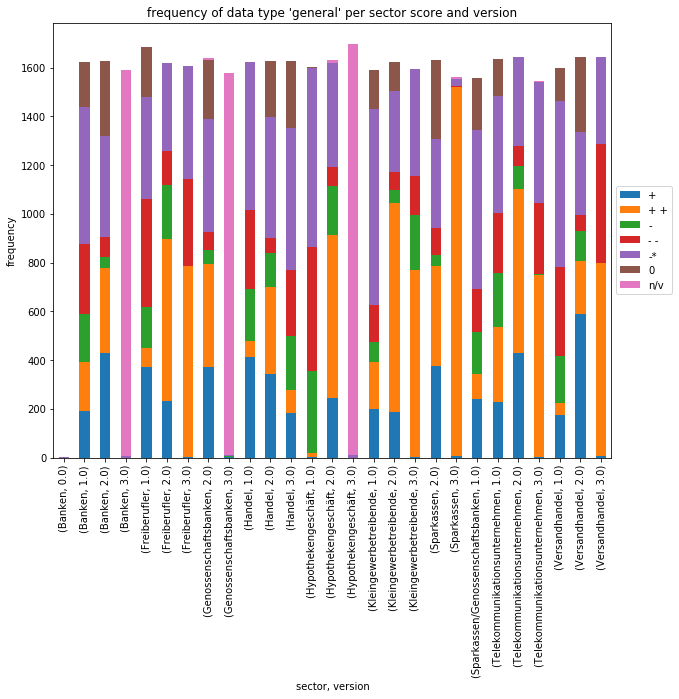

In [24]:
# Allgemein
ax = table2.groupby(["domain", "version", "allgemein"])["allgemein"].count().unstack("allgemein").fillna(0).plot(kind="bar", stacked=True, figsize=(10,8))
ax.set_xlabel("sector, version")
ax.set_ylabel("frequency")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title("frequency of data type 'general' per sector score and version")

The score for Banken, Genossenschaftsbanken and Hypothekengeschäft seems to not use allgemein in the version 3. All other scores are using the allgemein-Datenart.  
It might be interessting to analyse an indirect correlation with data in allgemein in the score of banken, for example. On the other hand it will be interessting to analyse the different influences of social dimensions over the different versions. So a branche like Versandhandel might also be interessting to analyse.

### Scores
To get an idea about the different scores and their differences we plot the distribution of continuous values of the scores.

Order:  ['Banken' 'Freiberufler' 'Genossenschaftsbanken' 'Handel'
 'Hypothekengeschäft' 'Kleingewerbetreibende' 'Sparkassen'
 'Sparkassen/Genossenschaftsbanken' 'Telekommunikationsunternehmen'
 'Versandhandel']


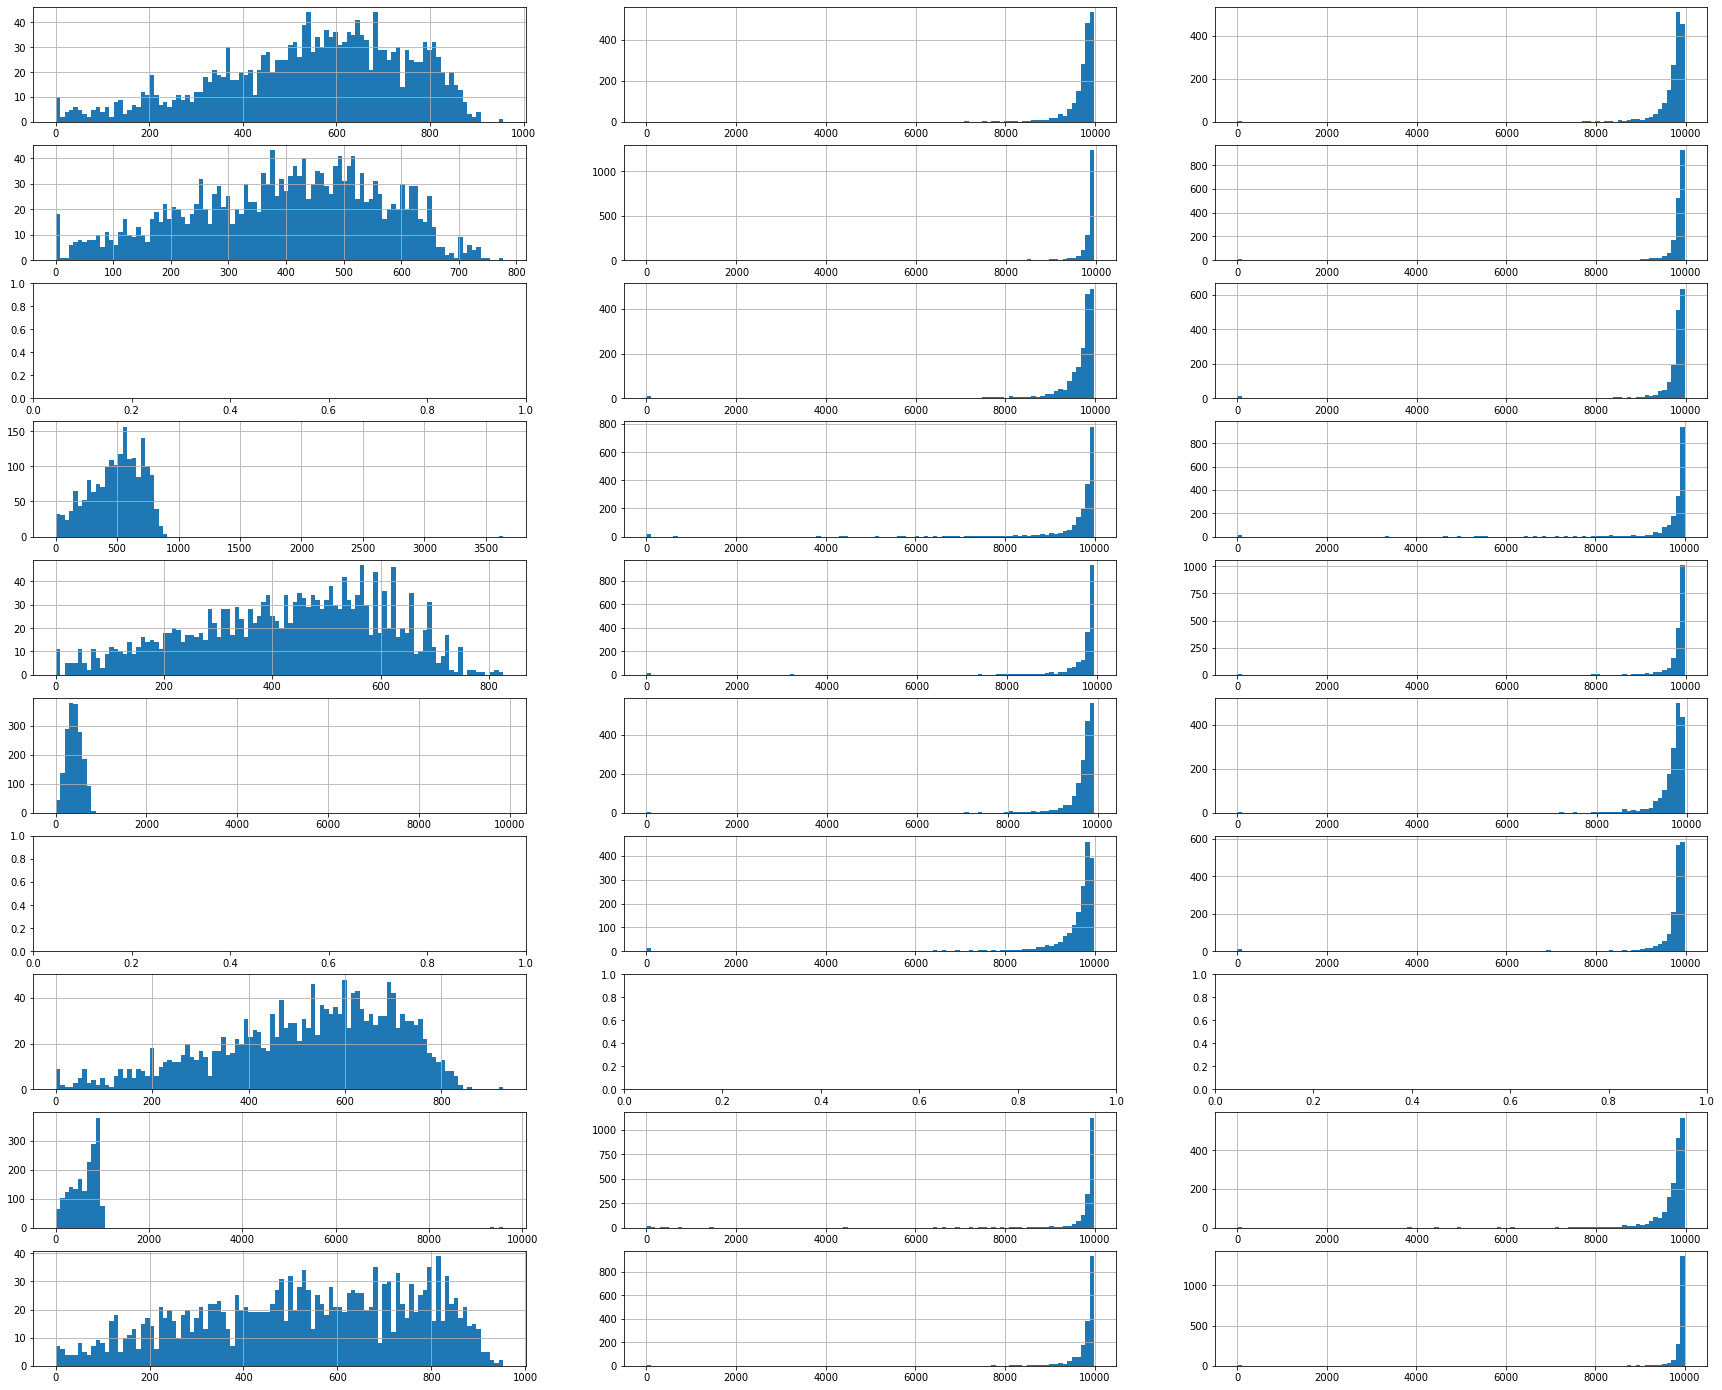

In [14]:
def plot_score_hist(df):
    score_groups = df.groupby(["domain", "version"])

    fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30,25))

    print("Order: ", df["domain"].unique())

    ax_ix = 0
    for d in df["domain"].unique():
        for v in range(1,4):

            if (d=="Genossenschaftsbanken" or d=="Sparkassen") and v==1:
                ax_ix += 1
                continue
            elif d=="Sparkassen/Genossenschaftsbanken" and (v==2 or v==3):
                ax_ix += 1
                continue

            score_groups.get_group((d, v))["score"].hist(bins=100, ax=axes.flatten()[ax_ix])
            ax_ix += 1
            
plot_score_hist(table2)

There seem to be some outliers in the first version of over 1000. We need to correct this error for the analysis.

### Example: Banken

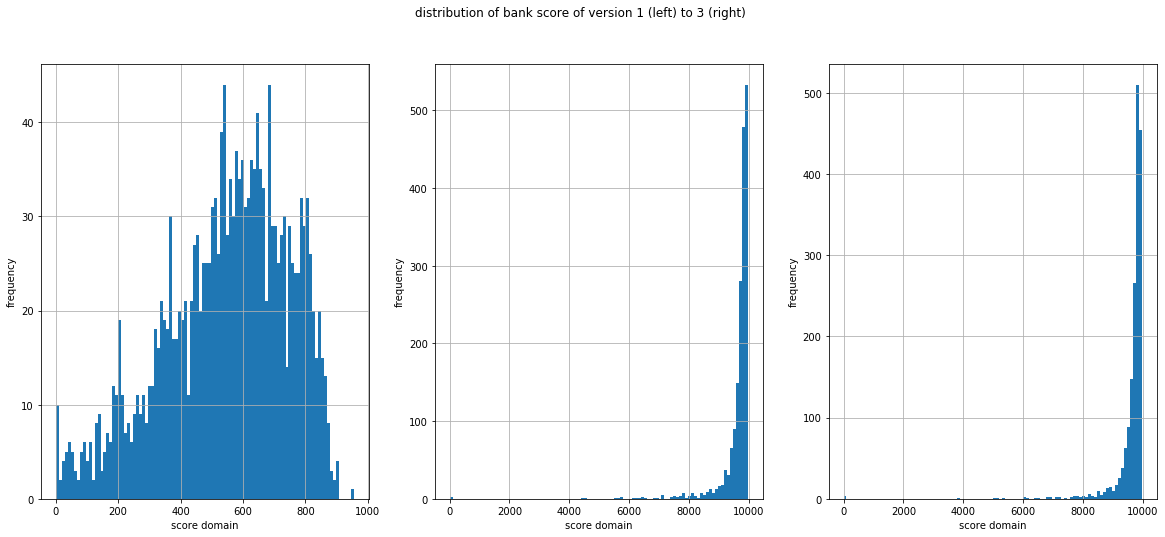

In [25]:
v1_bool = np.all([table2["version"]==1, table2["score"]<=1000], axis=0)

# Cut off only too high values
table2_cutoff = table2[np.any([table2["version"]==2, table2["version"]==3, table2["version"]==0, v1_bool], axis=0)]

score_groups = table2_cutoff.groupby(["domain", "version"])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

for v in range(1,4):
    ax = score_groups.get_group(("Banken", v))["score"].hist(bins=100, ax=axes[v-1])
    ax.set_xlabel("score domain")
    ax.set_ylabel("frequency")
fig.suptitle("distribution of bank score of version 1 (left) to 3 (right)");

In [57]:
bank1 = table2_cutoff[(table2_cutoff.domain=="Banken")&(table2_cutoff.version==1)].score.to_frame()
bank1["domain"] = "Banken"
bank1["version"] = 1.
bank2 = table2_cutoff[(table2_cutoff.domain=="Banken")&(table2_cutoff.version==2)].score.apply(lambda x: 1000-np.log(10000-x)*100).to_frame()
bank2["domain"] = "Banken"
bank2["version"] = 2.
bank3 = table2_cutoff[(table2_cutoff.domain=="Banken")&(table2_cutoff.version==3)].score.apply(lambda x: 1000-np.log(10000-x)*100).to_frame()
bank3["domain"] = "Banken"
bank3["version"] = 3.

bank = bank1.reset_index().append([bank2.reset_index(), bank3.reset_index()])

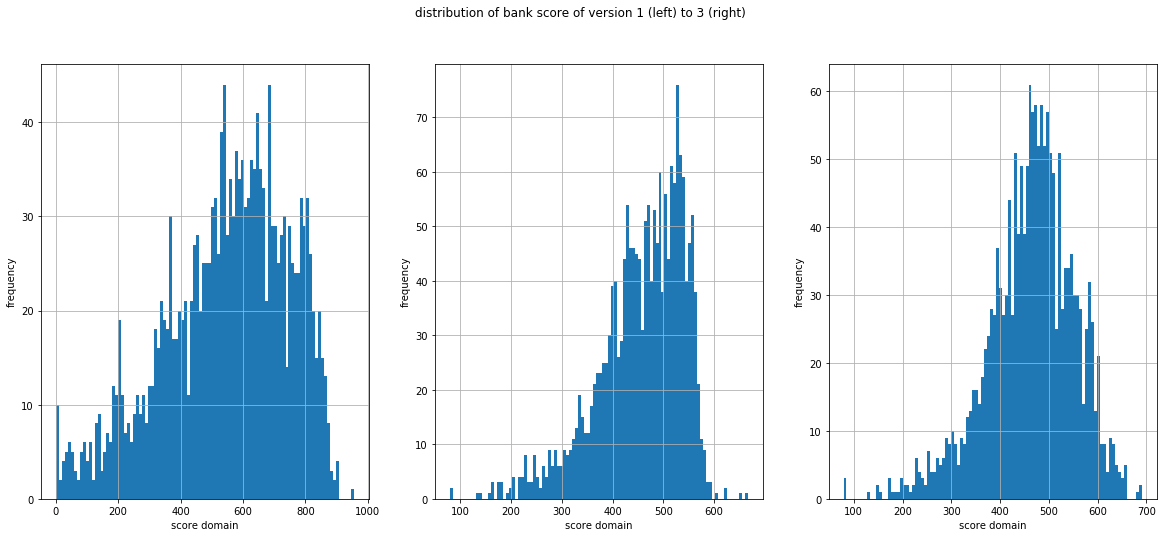

In [59]:
score_groups = bank.groupby(["domain", "version"])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

for v in range(1,4):
    ax = score_groups.get_group(("Banken", v))["score"].hist(bins=100, ax=axes[v-1])
    ax.set_xlabel("score domain")
    ax.set_ylabel("frequency")
fig.suptitle("distribution of bank score of version 1 (left) to 3 (right)");

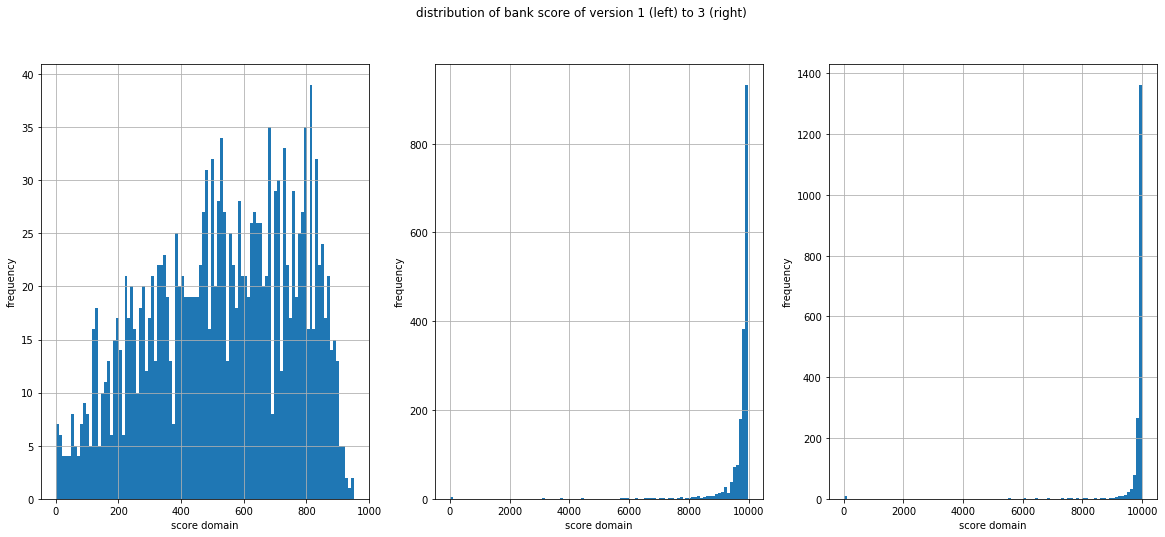

In [65]:
v1_bool = np.all([table2["version"]==1, table2["score"]<=1000], axis=0)

# Cut off only too high values
table2_cutoff = table2[np.any([table2["version"]==2, table2["version"]==3, table2["version"]==0, v1_bool], axis=0)]

score_groups = table2_cutoff.groupby(["domain", "version"])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

for v in range(1,4):
    ax = score_groups.get_group(("Versandhandel", v))["score"].hist(bins=100, ax=axes[v-1])
    ax.set_xlabel("score domain")
    ax.set_ylabel("frequency")
fig.suptitle("distribution of bank score of version 1 (left) to 3 (right)");

In [66]:
mail1 = table2_cutoff[(table2_cutoff.domain=="Versandhandel")&(table2_cutoff.version==1)].score.to_frame()
mail1["domain"] = "Versandhandel"
mail1["version"] = 1.
mail2 = table2_cutoff[(table2_cutoff.domain=="Versandhandel")&(table2_cutoff.version==2)].score.apply(lambda x: 1000-np.log(10000-x)*100).to_frame()
mail2["domain"] = "Versandhandel"
mail2["version"] = 2.
mail3 = table2_cutoff[(table2_cutoff.domain=="Versandhandel")&(table2_cutoff.version==3)].score.apply(lambda x: 1000-np.log(10000-x)*100).to_frame()
mail3["domain"] = "Versandhandel"
mail3["version"] = 3.

mail = mail1.reset_index().append([mail2.reset_index(), mail3.reset_index()])

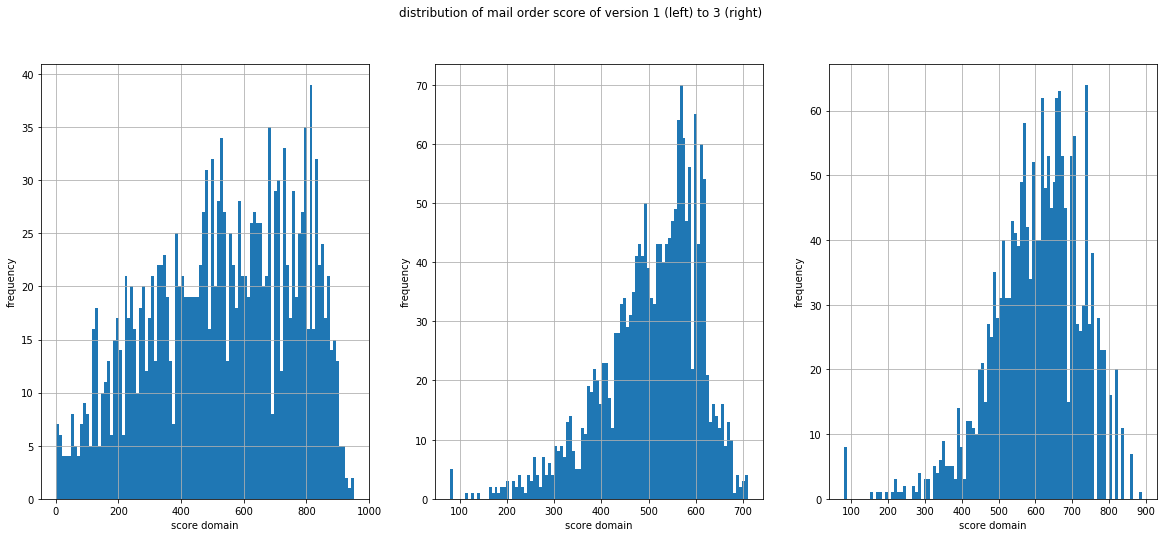

In [68]:
score_groups = mail.groupby(["domain", "version"])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

for v in range(1,4):
    ax = score_groups.get_group(("Versandhandel", v))["score"].hist(bins=100, ax=axes[v-1])
    ax.set_xlabel("score domain")
    ax.set_ylabel("frequency")
fig.suptitle("distribution of mail order score of version 1 (left) to 3 (right)");

### Corrected Scores

Order:  ['Banken' 'Freiberufler' 'Genossenschaftsbanken' 'Handel'
 'Hypothekengeschäft' 'Kleingewerbetreibende' 'Sparkassen'
 'Sparkassen/Genossenschaftsbanken' 'Telekommunikationsunternehmen'
 'Versandhandel']


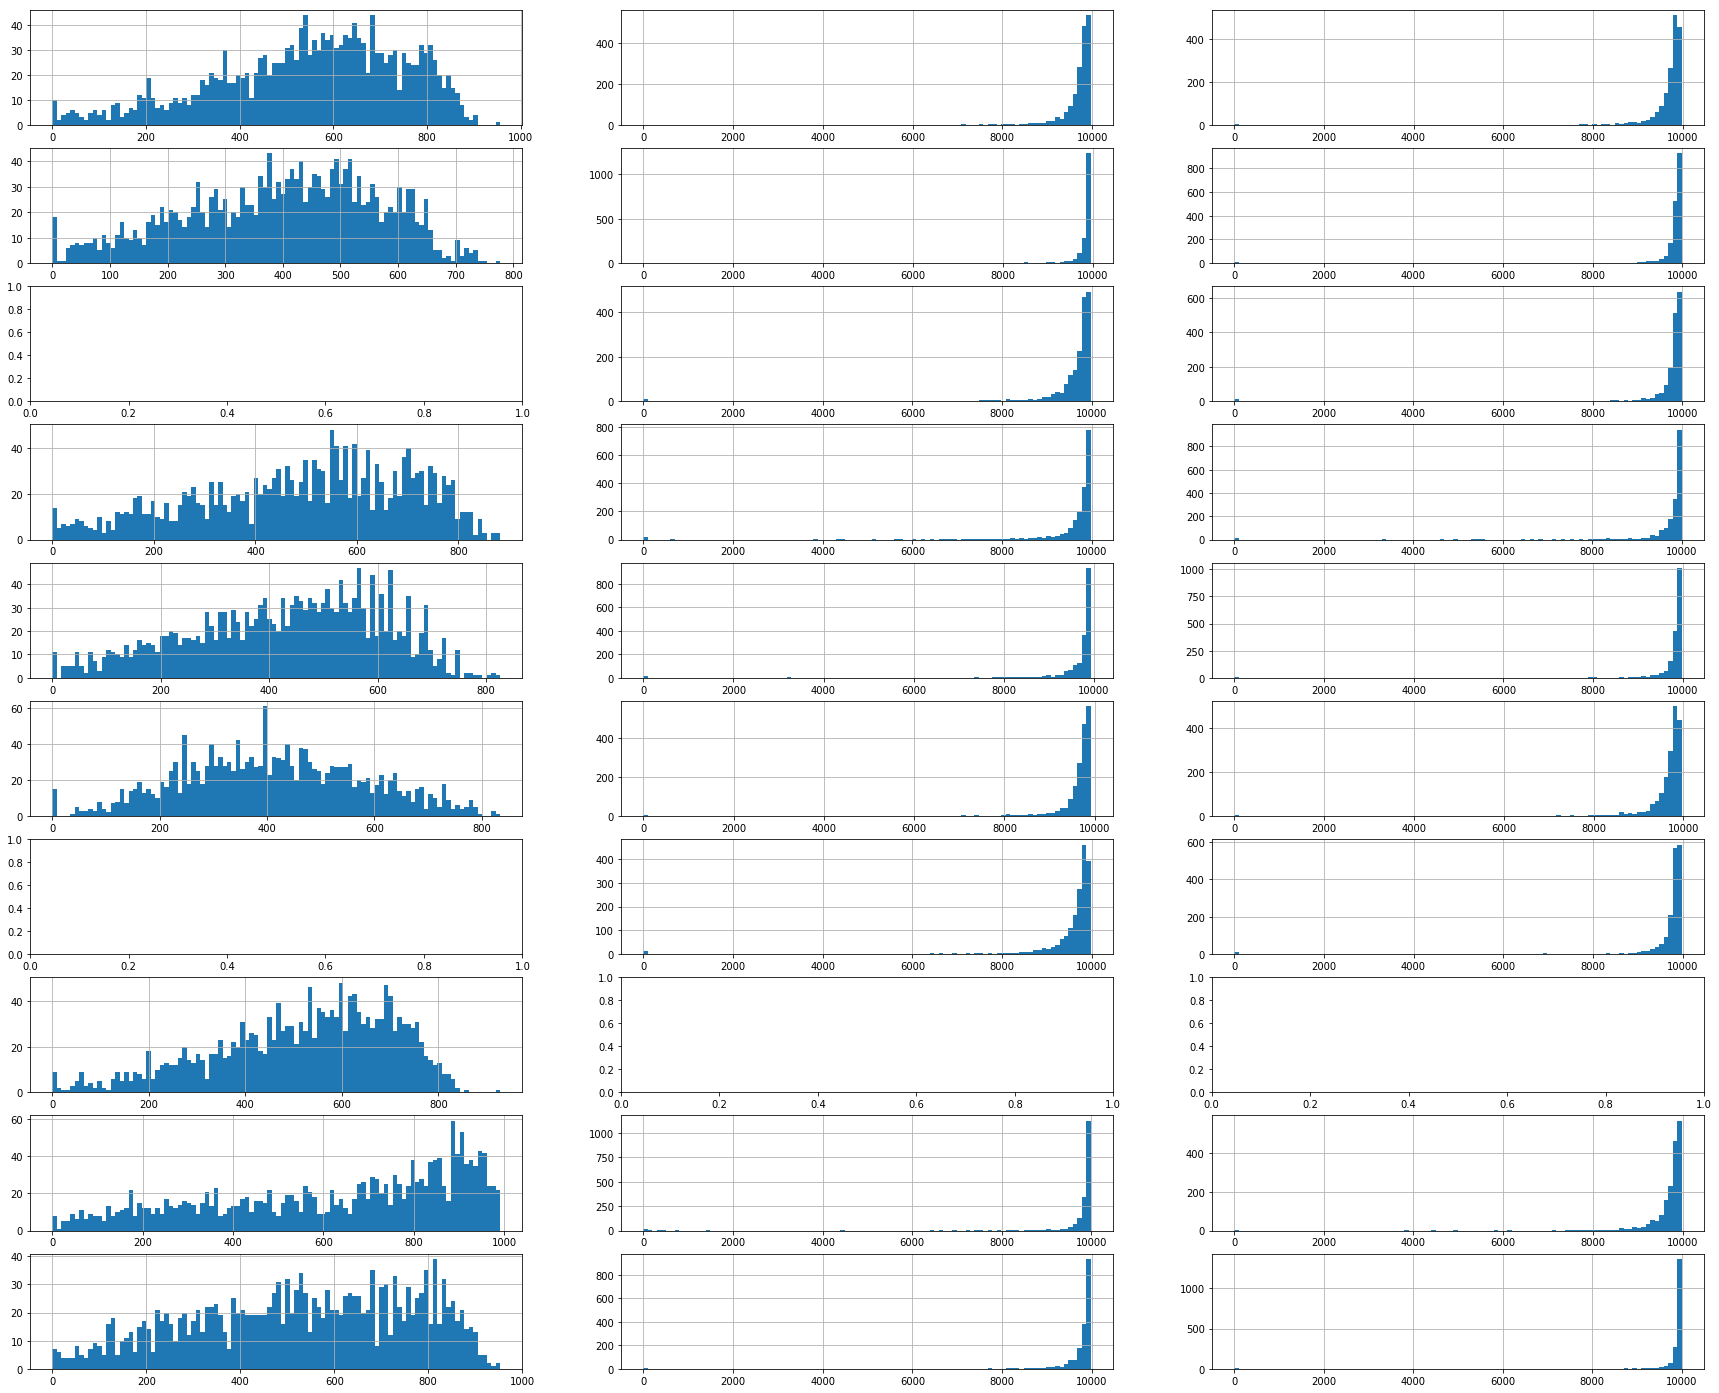

In [18]:
# WERTEBEREICH NOCHMALS ANSCHAUEN - 1. Version über 1000 Punkte !?  schwer vorstellbar.
# Look at histogram after cutting off too high values as well as negative feature-scores
v1_bool = np.all([table2["version"]==1, table2["score"]<=1000], axis=0)

# Cut off only too high values
table2_cutoff = table2[np.any([table2["version"]==2, table2["version"]==3, table2["version"]==0, v1_bool], axis=0)]

plot_score_hist(table2_cutoff)

There is an obvious difference in the version 1 and 2, 3. The first version seems to be somewhat normally distributed, while the Version 2 and 3 seem to be exponentially distributed.

### Scores without negative features (N, O, P)

Order:  ['Banken' 'Freiberufler' 'Genossenschaftsbanken' 'Handel'
 'Hypothekengeschäft' 'Kleingewerbetreibende' 'Sparkassen'
 'Sparkassen/Genossenschaftsbanken' 'Telekommunikationsunternehmen'
 'Versandhandel']


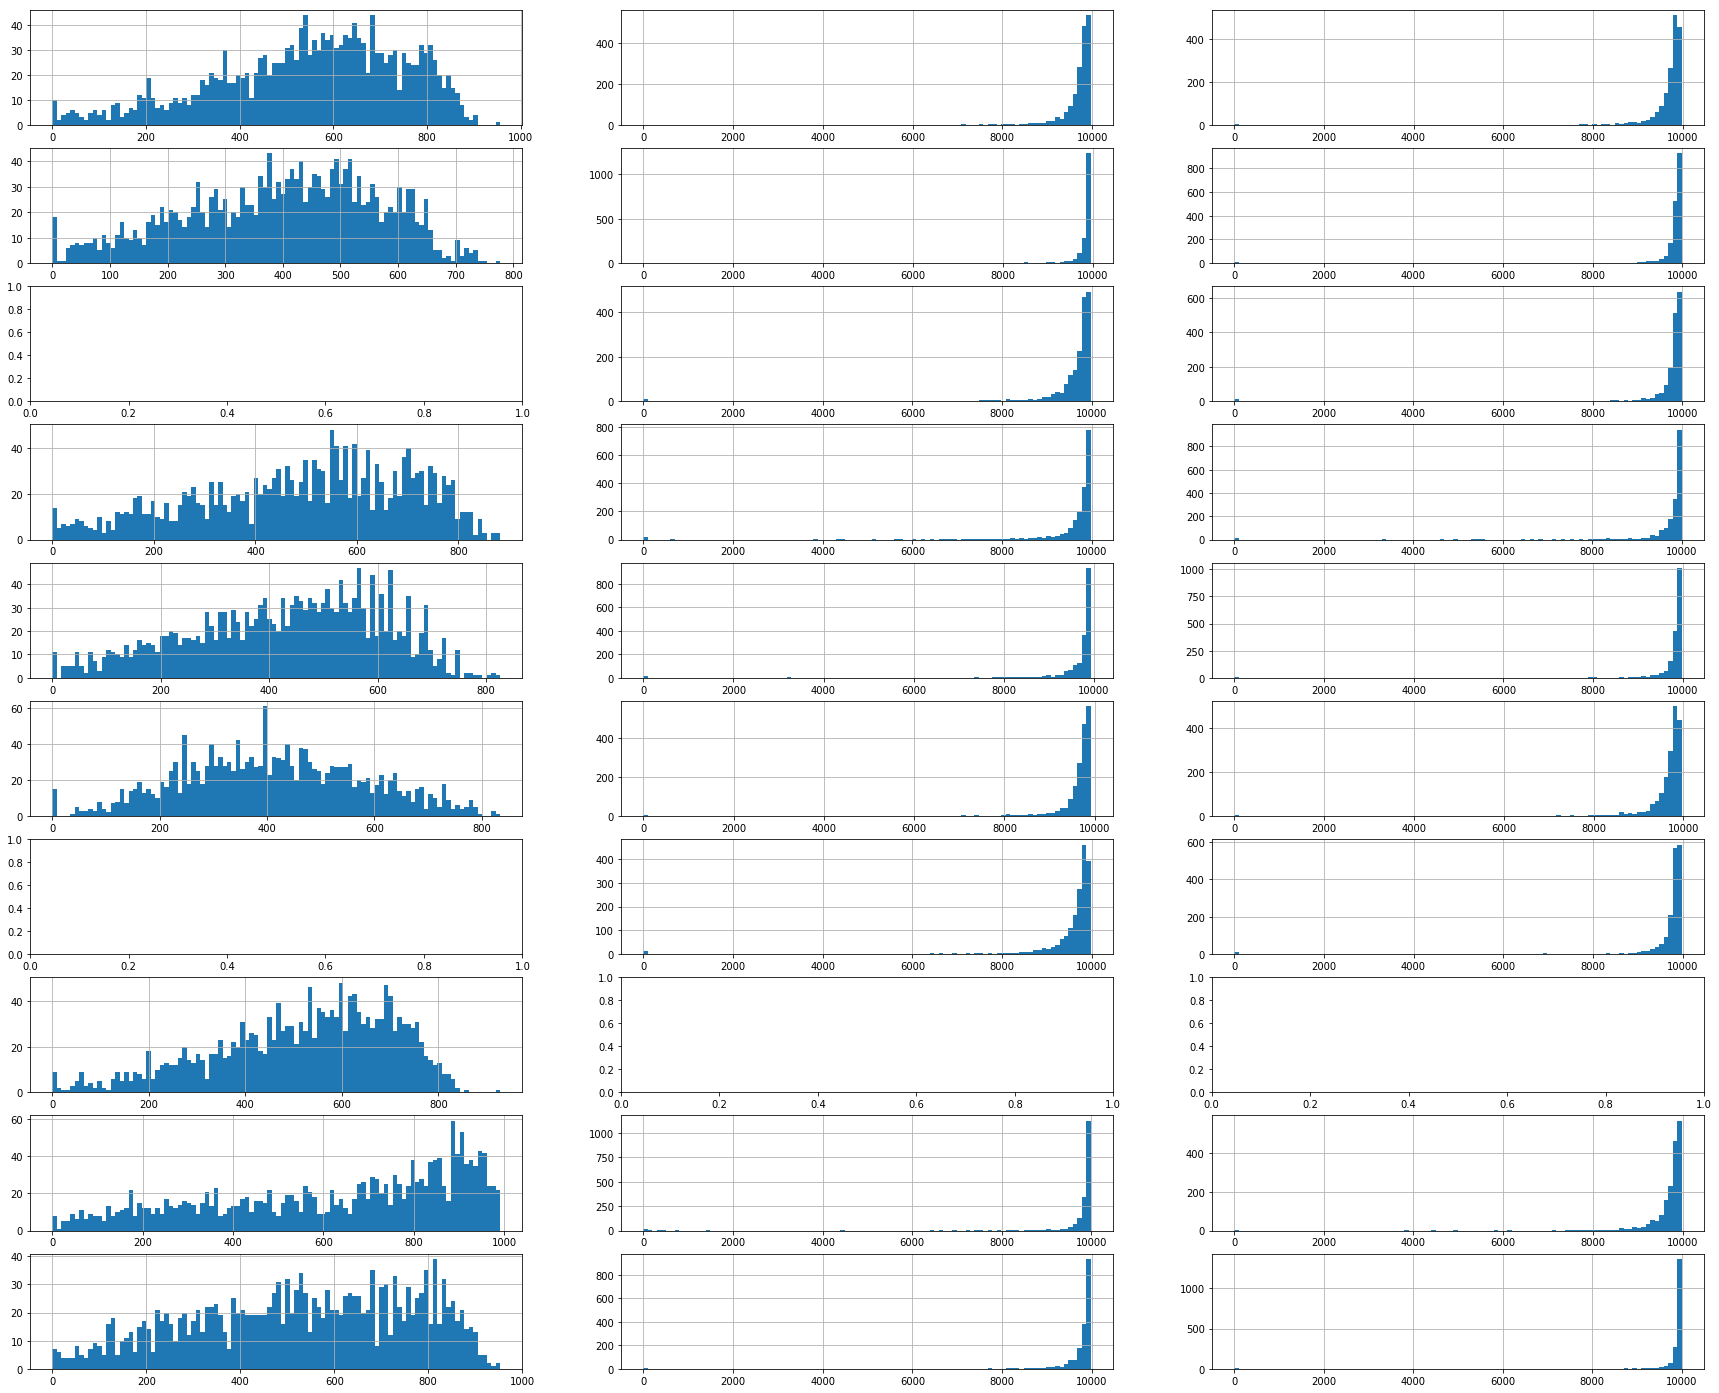

In [19]:
# also cut off negative feature scores
v23_bool = np.all([table2_cutoff["level"]!="N", table2_cutoff["level"]!="O", table2_cutoff["level"]!="P"], axis=0)

table2_cutoff = table2_cutoff[v23_bool]

plot_score_hist(table2_cutoff)

The domain stays the same: 
- Version 1: 0 - 1000
- Version 2: 0 - 10000
- Version 3: 0 - 10000

### Score, Version 2 & 3 cutted at 8000, to get a closer few on the density mass

Order:  ['Banken' 'Freiberufler' 'Genossenschaftsbanken' 'Handel'
 'Hypothekengeschäft' 'Kleingewerbetreibende' 'Sparkassen'
 'Sparkassen/Genossenschaftsbanken' 'Telekommunikationsunternehmen'
 'Versandhandel']


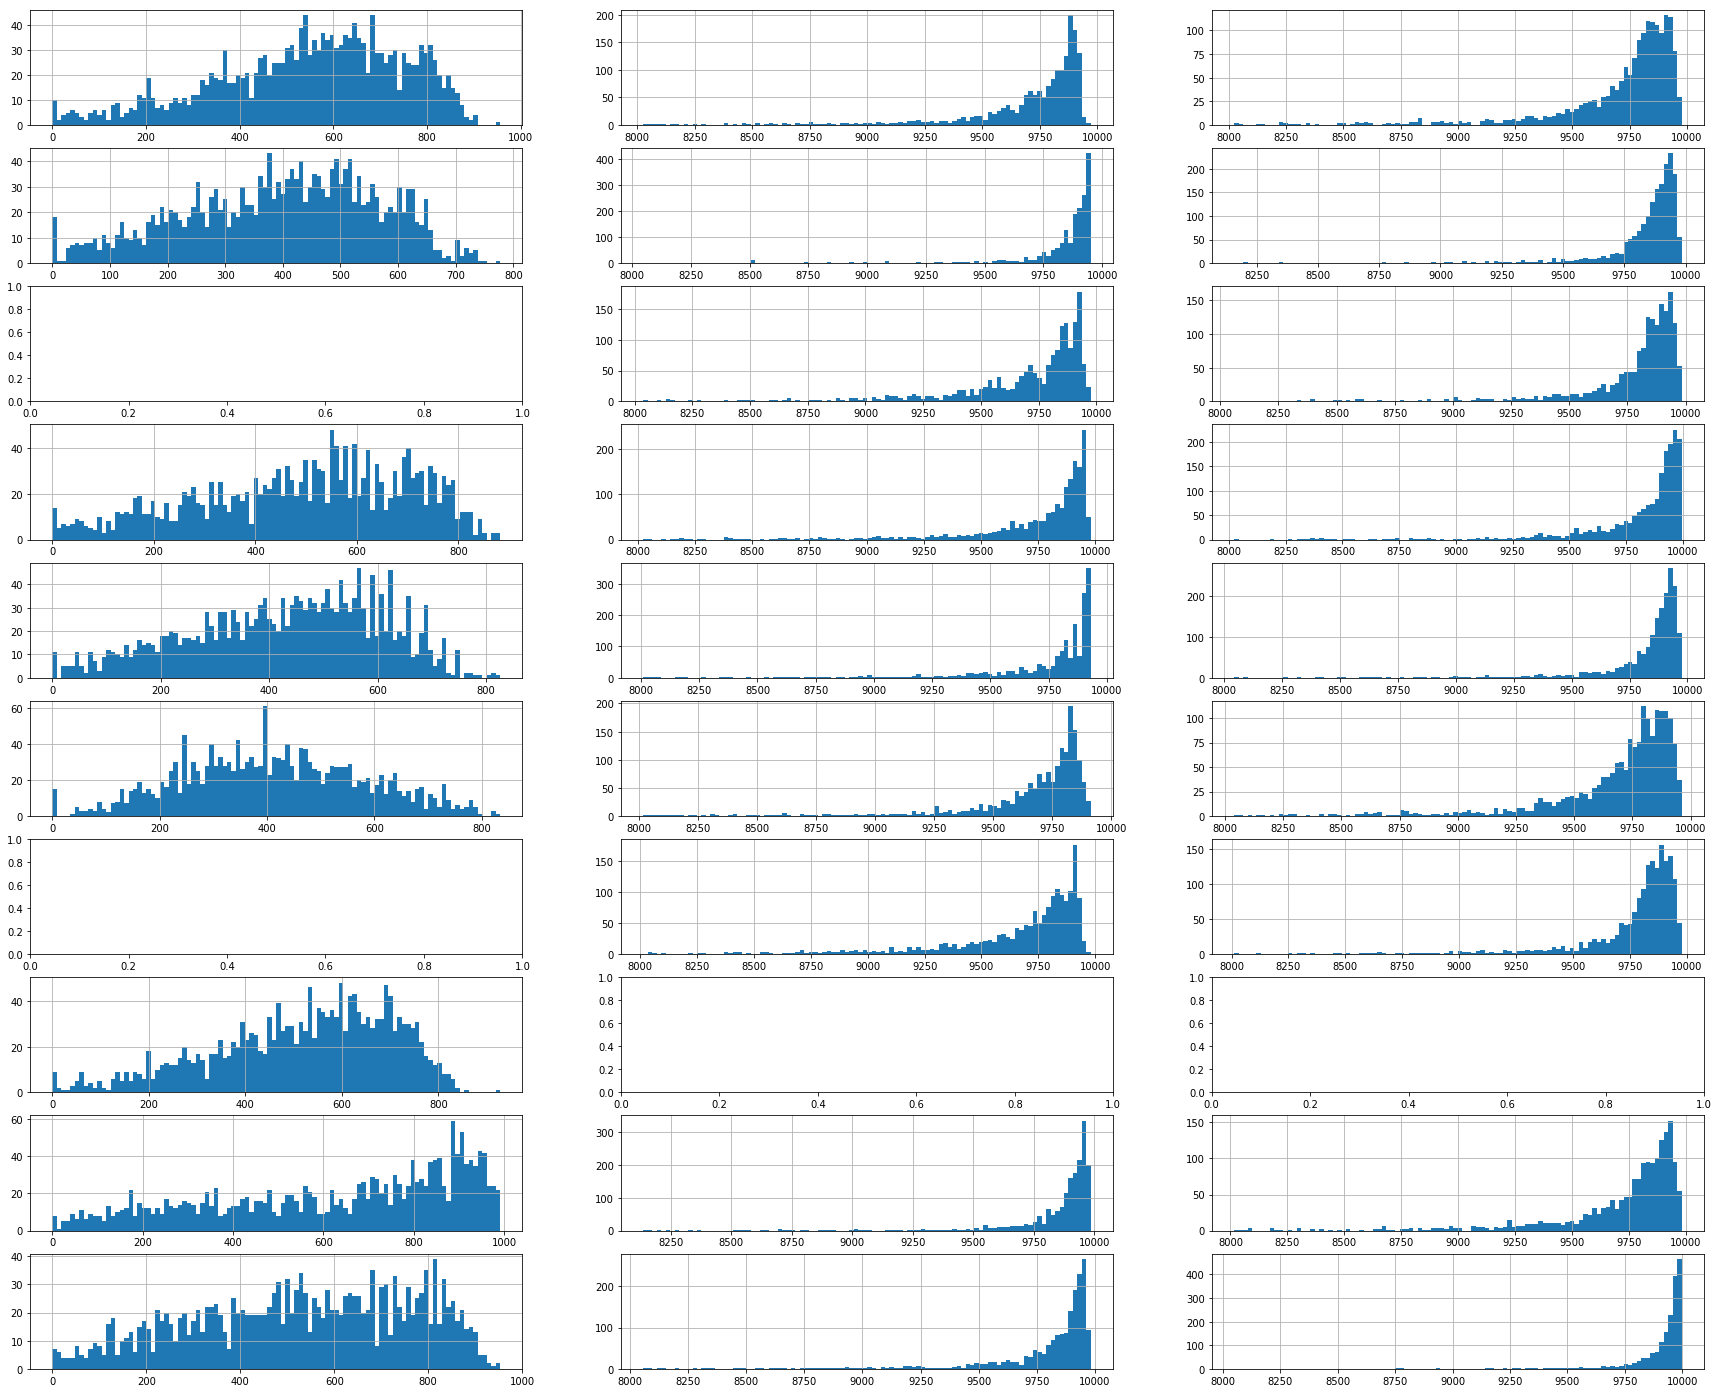

In [20]:
# further cut off of score values in version 2, 3
v1_cut = table2_cutoff["version"]==1 #np.all([table2["version"]==1, table2["score"]>=800], axis=0)
v2_cut = np.all([table2_cutoff["version"]==2, table2_cutoff["score"]>=8000], axis=0)
v3_cut = np.all([table2_cutoff["version"]==3, table2_cutoff["score"]>=8000], axis=0)

table2_cutoff = table2_cutoff[np.any([v1_cut, v2_cut, v3_cut], axis=0)]

plot_score_hist(table2_cutoff)

Now, the Version 2 and 3 seem to be very hardly skewed normal distributions, most of the times having less mass on the highest values. Obviously the scores are differentiated in a very small domain.

## Score & Version Frequencies

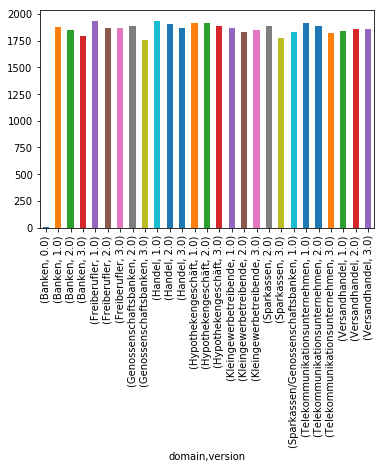

In [21]:
# Occurences - scores
table2.groupby(["domain", "version"])["domain"].count().plot(kind="bar")

Scores and versions are evenly distributed.

## Score Usage
The SCHUFA-Auskunft also displayes Information about the requests of Scores about a person in the last 12 months. By using those request frequencies, we can get a hint about how important a score is for a branche as well as for its consumers.

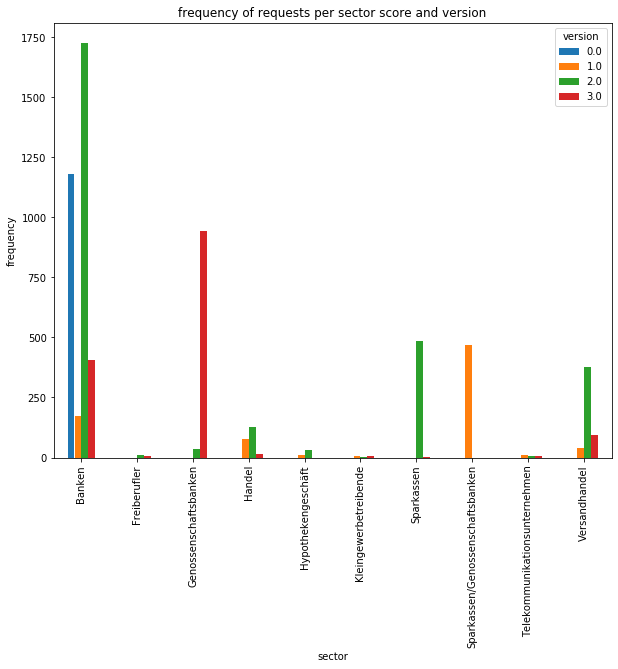

In [23]:
table1 = df_ds[df_ds["table"]=="table1"]
#ax = table1[["domain", "version"]].groupby(["domain"])["version"].value_counts().plot(kind="bar", figsize=(10,8))
ax = table1.groupby("domain")["version"].value_counts().unstack().fillna(0).plot(kind="bar", figsize=(10,8))

ax.set_xlabel("sector")
ax.set_ylabel("frequency")
ax.title.set_text("frequency of requests per sector score and version")

The banken-scores are the most requested, also somewhat frequent: Genossenschaftsbanken V3, Handeln V2 & V1, Sparkassen V2, Sparkassen/Genossenschaftsbanken V1, Versandhandel V2, V3, V1

This indicates relevance for Banken over all as well as some score-versions of other branches like Versandhandel, Sparkassen, Genossenschaftsbanken.

## Correlations between scores

In [23]:
targets = pd.read_csv(data_path + "datasets_v1/static_targets.csv", sep=";")

In [24]:
score_cols = [c for c in targets.columns if "_score" in c or c == "basisscore"]
targets[score_cols].corr("pearson").style.applymap(_color_map)

,basisscore,table2_Banken_1.0_score,table2_Banken_2.0_score,table2_Banken_3.0_score,table2_Freiberufler_1.0_score,table2_Freiberufler_2.0_score,table2_Freiberufler_3.0_score,table2_Genossenschaftsbanken_2.0_score,table2_Genossenschaftsbanken_3.0_score,table2_Handel_1.0_score,table2_Handel_2.0_score,table2_Handel_3.0_score,table2_Hypothekengeschäft_1.0_score,table2_Hypothekengeschäft_2.0_score,table2_Hypothekengeschäft_3.0_score,table2_Kleingewerbetreibende_1.0_score,table2_Kleingewerbetreibende_2.0_score,table2_Kleingewerbetreibende_3.0_score,table2_Sparkassen_2.0_score,table2_Sparkassen_3.0_score,table2_Sparkassen/Genossenschaftsbanken_1.0_score,table2_Telekommunikationsunternehmen_1.0_score,table2_Telekommunikationsunternehmen_2.0_score,table2_Telekommunikationsunternehmen_3.0_score,table2_Versandhandel_1.0_score,table2_Versandhandel_2.0_score,table2_Versandhandel_3.0_score,table2_Banken_0.0_score
basisscore,1,0.363551,0.784011,0.717283,0.406097,0.829107,0.663498,0.735838,0.624922,0.530446,0.656284,0.688017,0.500178,0.759587,0.639542,0.281446,0.861146,0.735005,0.731464,0.655862,0.498748,0.455051,0.763863,0.816507,0.456752,0.86237,0.725788,0.972741
table2_Banken_1.0_score,0.363551,1,0.413911,0.209766,0.350459,0.200851,0.122639,0.294858,0.179629,0.594373,0.197983,0.198714,0.457789,0.237507,0.175002,0.280597,0.332812,0.355051,0.297418,0.270828,0.611991,0.39716,0.158147,0.257839,0.623526,0.265977,0.0995236,-0.212835
table2_Banken_2.0_score,0.784011,0.413911,1,0.698529,0.275763,0.707185,0.719474,0.769145,0.684416,0.311343,0.666838,0.757884,0.286228,0.681849,0.682701,0.196587,0.772377,0.786777,0.753388,0.735934,0.38958,0.232897,0.769959,0.749929,0.41309,0.805429,0.715082,0.0416478
table2_Banken_3.0_score,0.717283,0.209766,0.698529,1,0.175138,0.624472,0.610191,0.61345,0.621866,0.254495,0.598419,0.616386,0.201298,0.665949,0.597795,0.145142,0.745103,0.610774,0.663425,0.658583,0.32034,0.196362,0.675209,0.699815,0.299776,0.683204,0.58504,-0.115885
table2_Freiberufler_1.0_score,0.406097,0.350459,0.275763,0.175138,1,0.251313,0.186003,0.360952,0.1704,0.530933,0.208236,0.195261,0.794492,0.253286,0.204777,0.497771,0.278909,0.257007,0.353441,0.190867,0.579787,0.256321,0.119728,0.168482,0.4573,0.236745,0.116575,0.280617
table2_Freiberufler_2.0_score,0.829107,0.200851,0.707185,0.624472,0.251313,1,0.67204,0.68274,0.628336,0.210406,0.681524,0.681427,0.260334,0.790684,0.632668,0.165599,0.866651,0.651743,0.691554,0.67473,0.280906,0.173396,0.703007,0.686609,0.268055,0.813007,0.670217,0.963864
table2_Freiberufler_3.0_score,0.663498,0.122639,0.719474,0.610191,0.186003,0.67204,1,0.747479,0.611865,0.216576,0.639497,0.723596,0.213532,0.569828,0.655375,0.141245,0.681198,0.747013,0.703866,0.714324,0.224595,0.0983715,0.678671,0.643994,0.144241,0.648788,0.700901,0.8583
table2_Genossenschaftsbanken_2.0_score,0.735838,0.294858,0.769145,0.61345,0.360952,0.68274,0.747479,1,0.63592,0.397568,0.706201,0.73533,0.404955,0.696927,0.632034,0.250687,0.739932,0.727734,0.773974,0.662193,0.428705,0.243148,0.736505,0.696732,0.358035,0.74315,0.657884,0.138824
table2_Genossenschaftsbanken_3.0_score,0.624922,0.179629,0.684416,0.621866,0.1704,0.628336,0.611865,0.63592,1,0.240202,0.589067,0.677768,0.210157,0.591574,0.663606,0.206455,0.670686,0.636811,0.595557,0.674446,0.261194,0.156988,0.653946,0.695415,0.236849,0.665736,0.620689,-0.100755
table2_Handel_1.0_score,0.530446,0.594373,0.311343,0.254495,0.530933,0.210406,0.216576,0.397568,0.240202,1,0.254269,0.235018,0.683453,0.259127,0.209718,0.400281,0.361828,0.317998,0.41699,0.219486,0.850021,0.474625,0.168529,0.301473,0.787811,0.289202,0.116038,-0.112369


We can see that the score-versions 2 and 3 are most of the time highly correlated with each other. Version 1 on the other hand has only with Version 1 medium correlation. Some scores are not or only weakly correlated.

## Basisscore

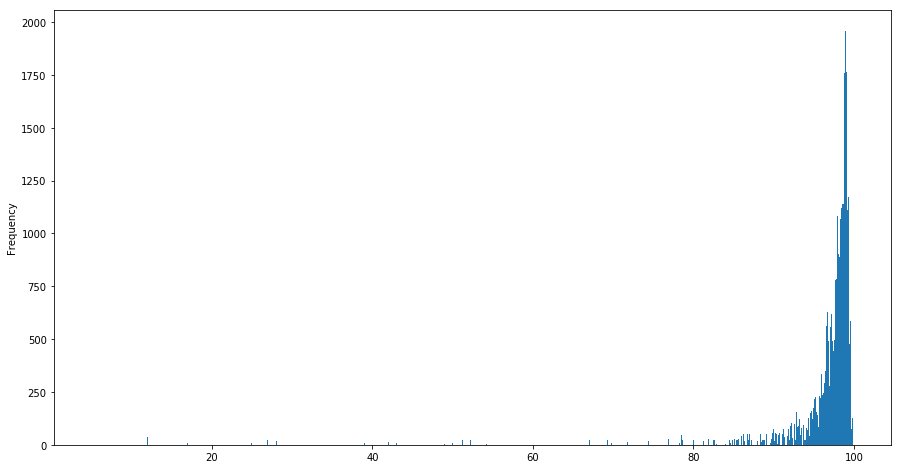

In [25]:
# Distribution
basisscores = table2["basisscore"]
basisscores.plot(kind="hist", figsize=(15,8), bins=1000)

The basisscore looks more like version 2 and 3 of the branche-scores and is projected to a 0-100 scale.

In [26]:
# There are way more different values than there are rating levels, 
# so we can assume that the percentage is not an ordinal mapping like in the branch-scores
basisscores.unique().shape

(610,)

## Conclusion
We will concentrate on the Branches Banken and Versandhandel and want to analyse the following questions:
- Banken: How do the social categories (allgemein) influence the score? Do they also correlate to the score even when they are not incorporated into the score (as said by the SCHUFA)?
- Versandhandel: How does the influence of social categories change in version 3, when they are still used?
- We also can reason about what version favours which persons (according to their social properties).